<a href="https://colab.research.google.com/github/omj3424/Machine_Learning_Study/blob/main/7_%EB%82%98%EC%9D%B4%EB%B8%8C_%EB%B2%A0%EC%9D%B4%EC%A6%88_%EB%B6%84%EB%A5%98%EA%B8%B0(Naive_Bayes_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##나이브 베이즈 분류기(Naive Bayes Classification)
* 베이즈 정리를 적용한 확률적 분류 알고리즘
* 모든 특성들이 독립임을 가정(naive 가정)
* 입력 특성에 따라 3개의 분류기 존재
 + 가우시안 나이브 베이즈 분류기 -> 연속형 변수일 때
 + 베르누이 나이브 베이즈 분류기 -> 이진형일 때
 + 다항 나이브 베이즈 분류기 -> 범주형 변수일 때

## 나이브 베이즈 분류기의 확률 모델


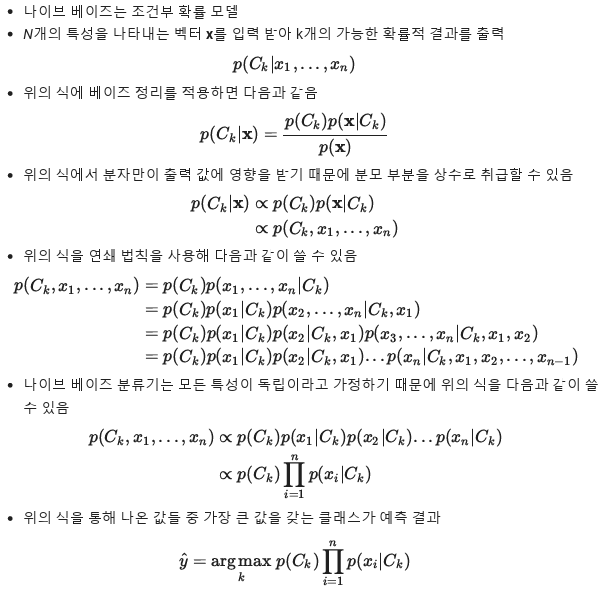

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.datasets import fetch_covtype, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn import metrics

In [2]:
prior = [0.45, 0.3, 0.15, 0.1]
likelihood = [[0.3, 0.3, 0.4], [0.7, 0.2, 0.1], [0.15, 0.5, 0.35], [0.6, 0.2, 0.2]]

idx = 0
for c, xs in zip(prior, likelihood):
  result = 1.

  for x in xs:
    result *= x
  result *= c

  idx += 1
  print(f"{idx}번째 클래스의 가능성: {result}")

1번째 클래스의 가능성: 0.0162
2번째 클래스의 가능성: 0.0042
3번째 클래스의 가능성: 0.0039375
4번째 클래스의 가능성: 0.0024000000000000002


## 산림 토양 데이터
* 산림 지역 토양의 특징 데이터
* 토양이 어떤 종류에 속하는지 예측

In [3]:
covtype = fetch_covtype()
print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

=================   ============
Classes                        7
Samples total             581012
Dimensionality                54
Features                     int
=================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional argument 'as_frame' is
se

In [4]:
pd.DataFrame(covtype.data)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
covtype.target

array([5, 5, 2, ..., 3, 3, 3], dtype=int32)

### 학습, 평가 데이터 분류

In [6]:
covtype_X = covtype.data
covtype_y = covtype.target

In [7]:
covtype_X_train, covtype_X_test, covtype_y_train, covtype_y_test = train_test_split(covtype_X, covtype_y, test_size=0.2)

In [8]:
print('전체 데이터 크기: {}'.format(covtype_X.shape))
print('학습 데이터 크기: {}'.format(covtype_X_train.shape))
print('평가 데이터 크기: {}'.format(covtype_X_test.shape))

전체 데이터 크기: (581012, 54)
학습 데이터 크기: (464809, 54)
평가 데이터 크기: (116203, 54)


## 전처리

### 전처리 전 데이터

In [9]:
covtype_df = pd.DataFrame(data=covtype_X)
covtype_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
covtype_train_df = pd.DataFrame(data=covtype_X_train)
covtype_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,...,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000
mean,2959.551790,155.588080,14.101730,269.277949,46.482508,2349.570318,212.158923,223.294801,142.489446,1980.126458,...,0.043951,0.090407,0.077793,0.002743,0.003298,0.000217,0.000525,0.027024,0.024003,0.015152
std,279.954088,111.907708,7.491538,212.428863,58.313438,1558.801759,26.790295,19.773092,38.292135,1323.507497,...,0.204987,0.286764,0.267846,0.052302,0.057335,0.014739,0.022906,0.162154,0.153060,0.122159
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3164.000000,260.000000,18.000000,384.000000,69.000000,3327.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,599.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 전처리 과정

In [11]:
scaler = StandardScaler()
covtype_X_train_scale = scaler.fit_transform(covtype_X_train)
covtype_X_test_scale = scaler.transform(covtype_X_test)

### 전처리 후 데이터
* 평균은 0에 가깝게, 표준편차는 1에 가깝게 정규화

In [12]:
covtype_train_df = pd.DataFrame(data=covtype_X_train_scale)
covtype_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,...,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05
mean,-4.896963e-16,-1.025131e-16,-1.393848e-16,-4.974314e-17,-3.234680e-17,-1.715175e-17,5.239845e-16,-1.457288e-16,3.165737e-16,5.356484e-17,...,-7.172552e-17,-5.136354e-18,1.623455e-17,-1.819125e-18,3.673410e-17,-1.739634e-17,1.281031e-17,-1.773265e-17,2.714930e-17,-1.216827e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.931191e+00,-1.390326e+00,-1.882357e+00,-1.267616e+00,-3.763845e+00,-1.507294e+00,-7.919254e+00,-1.129287e+01,-3.721119e+00,-1.496122e+00,...,-2.144106e-01,-3.152663e-01,-2.904402e-01,-5.244623e-02,-5.752428e-02,-1.474248e-02,-2.291773e-02,-1.666571e-01,-1.568239e-01,-1.240387e-01
25%,-5.377737e-01,-8.720417e-01,-6.809998e-01,-7.592100e-01,-6.770746e-01,-7.977741e-01,-5.285100e-01,-5.206475e-01,-6.134281e-01,-7.224194e-01,...,-2.144106e-01,-3.152663e-01,-2.904402e-01,-5.244623e-02,-5.752428e-02,-1.474248e-02,-2.291773e-02,-1.666571e-01,-1.568239e-01,-1.240387e-01
50%,1.301937e-01,-2.554615e-01,-1.470634e-01,-2.413891e-01,-2.826540e-01,-2.261806e-01,2.180298e-01,1.368123e-01,1.333314e-02,-2.040991e-01,...,-2.144106e-01,-3.152663e-01,-2.904402e-01,-5.244623e-02,-5.752428e-02,-1.474248e-02,-2.291773e-02,-1.666571e-01,-1.568239e-01,-1.240387e-01
75%,7.302927e-01,9.330191e-01,5.203570e-01,5.400498e-01,3.861463e-01,6.270398e-01,7.032807e-01,6.931245e-01,6.662094e-01,4.305787e-01,...,-2.144106e-01,-3.152663e-01,-2.904402e-01,-5.244623e-02,-5.752428e-02,-1.474248e-02,-2.291773e-02,-1.666571e-01,-1.568239e-01,-1.240387e-01
max,3.209273e+00,1.826614e+00,6.927593e+00,5.308710e+00,9.474970e+00,3.058397e+00,1.561801e+00,1.552880e+00,2.912104e+00,3.923574e+00,...,4.663948e+00,3.171922e+00,3.443049e+00,1.906715e+01,1.738396e+01,6.783118e+01,4.363433e+01,6.000345e+00,6.376578e+00,8.062002e+00


In [13]:
covtype_test_df = pd.DataFrame(data=covtype_X_test_scale)
covtype_test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,...,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000
mean,-0.003331,0.003071,0.001317,0.003537,-0.005458,0.001849,-0.002403,0.006047,0.005068,0.000622,...,0.005446,-0.000257,-0.001440,0.002838,-0.003790,-0.004233,-0.002630,-0.006807,-0.007886,-0.003787
std,1.000548,1.000270,0.997803,1.002833,0.998431,1.001457,0.996189,0.998879,0.997694,1.002601,...,1.012033,0.999637,0.997731,1.026627,0.966603,0.844344,0.940904,0.979923,0.975138,0.984851
min,-3.924047,-1.390326,-1.882357,-1.267616,-3.643804,-1.507294,-6.202213,-9.269921,-3.721119,-1.496122,...,-0.214411,-0.315266,-0.290440,-0.052446,-0.057524,-0.014742,-0.022918,-0.166657,-0.156824,-0.124039
25%,-0.534202,-0.872042,-0.681000,-0.759210,-0.677075,-0.800982,-0.528510,-0.520648,-0.613428,-0.725442,...,-0.214411,-0.315266,-0.290440,-0.052446,-0.057524,-0.014742,-0.022918,-0.166657,-0.156824,-0.124039
50%,0.130194,-0.246526,-0.147063,-0.241389,-0.299803,-0.225539,0.218030,0.136812,0.013333,-0.201077,...,-0.214411,-0.315266,-0.290440,-0.052446,-0.057524,-0.014742,-0.022918,-0.166657,-0.156824,-0.124039
75%,0.723149,0.941955,0.520357,0.568295,0.386146,0.629606,0.703281,0.693124,0.666209,0.430579,...,-0.214411,-0.315266,-0.290440,-0.052446,-0.057524,-0.014742,-0.022918,-0.166657,-0.156824,-0.124039
max,3.205701,1.826614,6.794109,5.238098,9.509268,3.039152,1.561801,1.552880,2.885989,3.881262,...,4.663948,3.171922,3.443049,19.067147,17.383964,67.831182,43.634332,6.000345,6.376578,8.062002


## 가우시안 나이브 베이즈
* 입력 특성이 가우시안(정규) 분포를 갖는다고 가정

In [14]:
model = GaussianNB()
model.fit(covtype_X_train_scale, covtype_y_train)

GaussianNB()

In [15]:
predict = model.predict(covtype_X_train_scale)
acc = metrics.accuracy_score(covtype_y_train, predict)
f1 = metrics.f1_score(covtype_y_train, predict, average=None)

print('Train Accuracy: {}'.format(acc))
print('Train F1 score: {}'.format(f1))

Train Accuracy: 0.08808779520190013
Train F1 score: [0.04075402 0.01791514 0.33355792 0.13778969 0.04317888 0.07378965
 0.23643793]


In [16]:
predict = model.predict(covtype_X_test_scale)
acc = metrics.accuracy_score(covtype_y_test, predict)
f1 = metrics.f1_score(covtype_y_test, predict, average=None)

print('Test Accuracy: {}'.format(acc))
print('Test F1 score: {}'.format(f1))

Test Accuracy: 0.08741598753904804
Test F1 score: [0.03915218 0.01809323 0.3405929  0.14055271 0.04275586 0.06669733
 0.22988506]


In [17]:
import matplotlib.pyplot as plt
#plt.style.use(['seaborn-whitegrid'])
from sklearn.datasets import make_blobs

In [18]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [19]:
X, y =make_blobs(n_samples=1000)

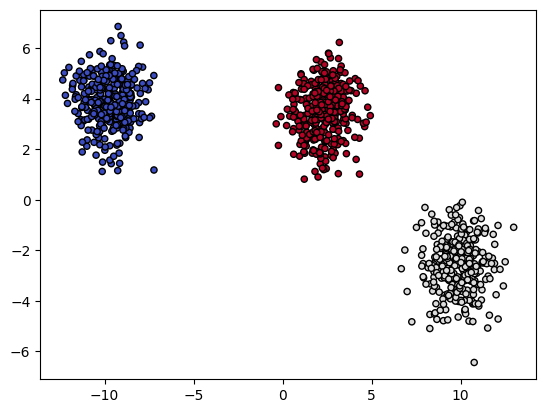

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [21]:
model = GaussianNB()
model.fit(X, y)

GaussianNB()

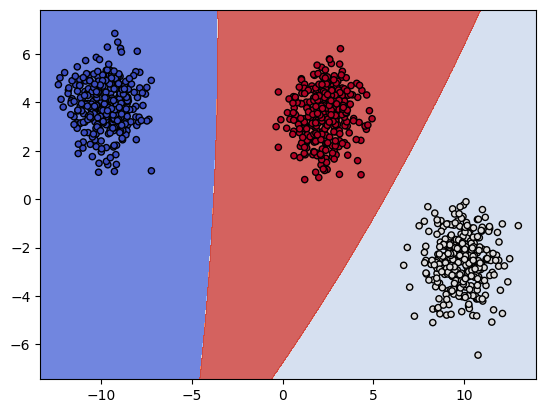

In [22]:
xx, yy = make_meshgrid(X[:, ], X[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

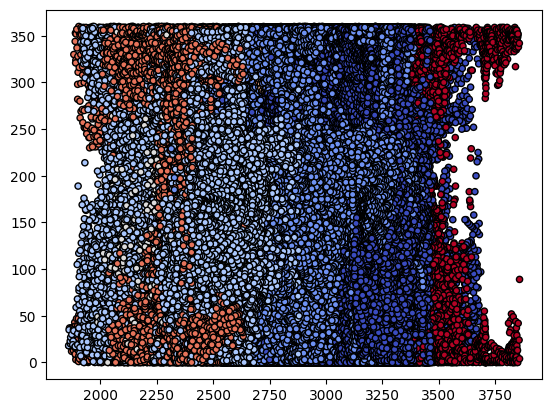

In [23]:
plt.scatter(covtype_X[:, 0], covtype_X[:, 1], c=covtype_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');